In [154]:
import numpy as np
from scipy.stats import binom, poisson, expon, beta, uniform
from scipy.special import binom as binomCof
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

### Examples

In [78]:
expon.stats(loc=0.5, moments='mvsk')

(array(1.5), array(1.), array(2.), array(6.))

In [79]:
def exponentialCDF(rate, t):
    p = 1-(np.exp(-(1/rate)*t))
    
    return p

In [80]:
exponentialCDF(0.5, 1.5)

0.950212931632136

In [81]:
exponentialCDF(27.03, 19)

0.5048639365386571

In [82]:
1-exponentialCDF(0.5, 0.25)

0.6065306597126334

In [83]:
exponentialCDF(40, 50)

0.7134952031398099

In [84]:
expon.cdf(1.5, scale=0.5) # Beta (1/2=0.5 inter event time)  -- Lambda (2 events/hour) 

0.950212931632136

In [85]:
expon.cdf(19, scale=27.03) # Beta (200/7.5=27.03 every 27.03 yards a blemish appears)  Lambda (7.5 blemishes/in 200 yards) 

0.5048639365386571

### P1

In [2]:
beta=10 # 

In [87]:
expon.cdf(1, scale=beta)

0.09516258196404044

In [3]:
expon.cdf(6, scale=beta)

0.4511883639059736

In [88]:
1-expon.cdf(6, scale=beta)

0.5488116360940264

In [89]:
expon.cdf(7, scale=beta)-expon.cdf(6, scale=beta)

0.05222633230261686

In [90]:
(expon.cdf(7, scale=beta)- expon.cdf(6, scale=beta)) / (1-expon.cdf(6, scale=beta))

0.09516258196404033

### P2

In [6]:
k, n = 5, 20 # Evidence: 5 successes in 20 trials

In [7]:
hit = 0.3 # Hypothesis 1
flop = 0.1 # Hypothesis 2

hit_prior = 0.5 # P(H1)
flop_prior = 0.5 # P(H2)

In [8]:
print('Priors:')
print(hit_prior)
print(flop_prior)
print('\nLikelihood:')
print(binom.pmf(k, n, hit))
print(binom.pmf(k, n, flop))
print('\nPosteriors:')
print( binom.pmf(k, n, hit)*hit_prior / (binom.pmf(k, n, hit)*hit_prior + binom.pmf(k, n, flop)*flop_prior) )
print( binom.pmf(k, n, flop)*flop_prior / (binom.pmf(k, n, hit)*hit_prior + binom.pmf(k, n, flop)*flop_prior) )

Priors:
0.5
0.5

Likelihood:
0.17886305056987964
0.031921361119954424

Posteriors:
0.8485591943728448
0.15144080562715523


In [9]:
k, n = 4, 20 # Evidence: 4 successes in 20 trials
print(f'Ratio: {k/n}')

Ratio: 0.2


In [11]:
hit_prior = np.array([0.2,0.4,0.5,0.75,0.9,0.999])
flop_prior = []
hit_posterior = []
flop_posterior = []
for p in hit_prior:
    q = 1-p
    
    flop_prior.append(q)
    
    p2 = binom.pmf(k, n, hit)*p / (binom.pmf(k, n, hit)*p + binom.pmf(k, n, flop)*q)
    q2 = binom.pmf(k, n, flop)*q / (binom.pmf(k, n, hit)*p + binom.pmf(k, n, flop)*q)
    
    hit_posterior.append(p2)
    flop_posterior.append(q2)
    
    print(f'P(Hit): {np.round(p,2)} --> {np.round(p2,4)}')
    print(f'P(Flop): {np.round(q,2)} --> {np.round(q2,4)}')
    print('')

P(Hit): 0.2 --> 0.2664
P(Flop): 0.8 --> 0.7336

P(Hit): 0.4 --> 0.492
P(Flop): 0.6 --> 0.508

P(Hit): 0.5 --> 0.5923
P(Flop): 0.5 --> 0.4077

P(Hit): 0.75 --> 0.8134
P(Flop): 0.25 --> 0.1866

P(Hit): 0.9 --> 0.9289
P(Flop): 0.1 --> 0.0711

P(Hit): 1.0 --> 0.9993
P(Flop): 0.0 --> 0.0007



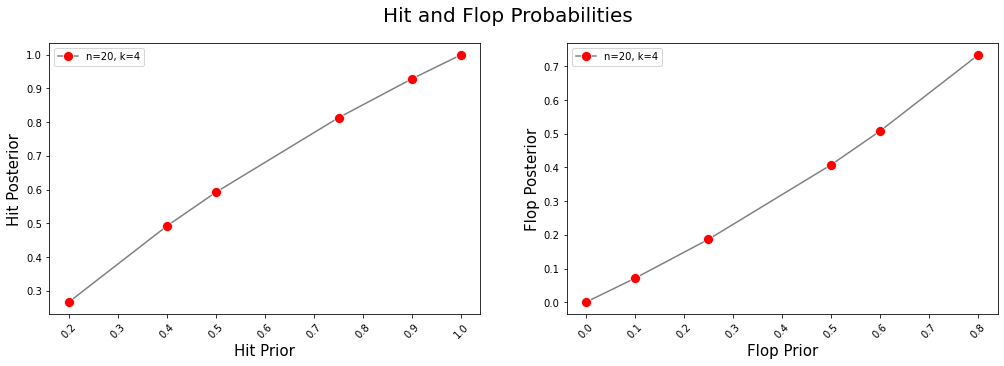

In [20]:
fig , axes = plt.subplots(1,2, figsize=(17,5))

plt.suptitle('Hit and Flop Probabilities', fontsize=20)
ax = axes[0]
sns.lineplot(x=hit_prior, y=hit_posterior, color='gray', 
             marker='o', markersize=10, markerfacecolor='red', ax=ax, label=f'n={n}, k={k}')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Hit Prior', fontsize=15)
ax.set_ylabel('Hit Posterior', fontsize=15)

ax = axes[1]
sns.lineplot(x=flop_prior, y=flop_posterior, color='gray', 
             marker='o', markersize=10, markerfacecolor='red', ax=ax, label=f'n={n}, k={k}')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Flop Prior', fontsize=15)
ax.set_ylabel('Flop Posterior', fontsize=15)

plt.legend()
plt.show()

### P3

In [99]:
poisson.pmf(2, mu=1.5)

0.25102143016698353

In [100]:
poisson.cdf(1, mu=1.5) # P(X<2)

0.5578254003710748

In [101]:
m = 2.5 # 2.5 breakdowns per month

In [102]:
e_breaks = 0.5*3 + 0.5*1.5
e_breaks

2.25

In [103]:
e_cost = 1700*e_breaks
e_cost

3825.0

In [25]:
2.5*1500

3750.0

In [105]:
print('Likelihood:')
print(0.5)
print(0.5)

Likelihood:
0.5
0.5


In [106]:
print('Likelihood:')
print(poisson.pmf(2,mu=1.5))
print(poisson.pmf(2,mu=3))

Likelihood:
0.25102143016698353
0.22404180765538775


In [22]:
print((poisson.pmf(2, mu=1.5)*0.5 + poisson.pmf(2, mu=3)*0.5))

0.23753161891118563


In [107]:
print('\nPosteriors:')
print(poisson.pmf(2, mu=1.5)*0.5 / (poisson.pmf(2, mu=1.5)*0.5 + poisson.pmf(2, mu=3)*0.5))
print(poisson.pmf(2, mu=3)*0.5 / (poisson.pmf(2, mu=1.5)*0.5 + poisson.pmf(2, mu=3)*0.5))


Posteriors:
0.5283958222438626
0.4716041777561374


In [24]:
0.5284*1.5 +0.4716*3, (0.5284*1.5 +0.4716*3)*1700

(2.2074, 3752.5799999999995)

### P4

In [122]:
def beta_parameters(x1,p1, x2,p2):
    
    def square(x): 
        return x*x

    def objective(v):
        (a, b) = v
        temp  = np.square( beta.cdf(x1, a, b) - p1 )
        temp += np.square( beta.cdf(x2, a, b) - p2 )
        return temp
    
    # arbitrary initial guess of (3, 3) for parameters
    xopt = optimize.fmin(objective, (1, 2))
    print(xopt)
    return (xopt[0], xopt[1])
    

def beta_parameters_2(x1,p1, x2,p2):
    

    def objective(v):
        (a, b) = v
        temp  = np.square(beta.cdf(x1, a, b) - p1)
        temp += np.square(beta.cdf(x2, a, b) - p2) 
        return temp
    
    # arbitrary initial guess of (3, 3) for parameters
    xopt = optimize.minimize(objective, (1, 2))
    print('xopt:',xopt)
    return (xopt[0], xopt[1])

In [123]:
beta_parameters(0.50,0.20, 0.75,0.35)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 97
[0.92581723 0.29163895]


(0.9258172334536299, 0.2916389544972169)

In [109]:
beta_parameters(0.1,0.05, 0.3,0.55)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 89
[3.16943689 7.56504219]


(3.169436887654957, 7.565042188725487)

In [18]:
beta.cdf(0.1, 3, 7)

0.052972138

In [19]:
beta.cdf(0.3, 3, 7)

0.5371688339999998

In [20]:
beta.cdf(0.5, 3, 7), 1-beta.cdf(0.5, 3, 7)

(0.91015625, 0.08984375)

In [48]:
beta.cdf(0.1, 3+1, 10-3+1)

0.018534761200000006

In [49]:
# BOOK EXAMPLE
beta.cdf(0.34, 5, 5)

0.15529225994702847

In [110]:
# BOOK EXAMPLE
# If 0.5 --> 0.2
#    0.75 --> 0.35
# Then ALPHA=1.10 and BETA=3.48

mu,var,_,_ = beta.stats(a=1.1,b=3.48, moments='mvsk')
print(f'Mean: {mu}')
print(f'Std: {np.sqrt(var)}')

Mean: 0.24017467248908297
Std: 0.18084370129528995


In [111]:
beta_parameters(0.50,0.20, 0.75,0.35)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 97
[0.92581723 0.29163895]


(0.9258172334536299, 0.2916389544972169)

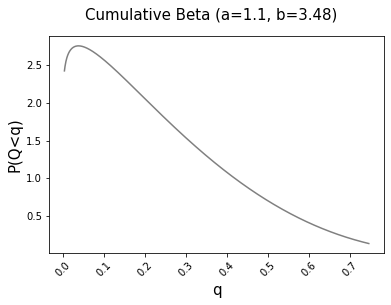

In [162]:
al, be = 1.10, 3.48

x = np.linspace(beta.ppf(0.01, al, be),
                beta.ppf(0.99, al, be), 1000)


fig , ax = plt.subplots(1,1, figsize=(6,4))

plt.suptitle(f'Cumulative Beta (a={al}, b={be})', fontsize=15)
sns.lineplot(x=x, y=beta.pdf(x, al, be), color='gray', ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('q', fontsize=15)
ax.set_ylabel('P(Q<q)', fontsize=15)


#plt.legend()
plt.show()

In [160]:
from scipy.optimize import minimize, minimize_scalar

In [136]:
def objective_function(v):
    #(a, b) = v
    loss  = np.square(beta.cdf(0.5, v[0], v[1]) - 0.2)
    loss += np.square(beta.cdf(0.75, v[0], v[1]) - 0.35) 
        
    return loss

In [142]:
res = minimize(objective_function, x0= (1,1))
res

      fun: 1.6410444741060996e-11
 hess_inv: array([[95.40369189, 28.2971957 ],
       [28.2971957 ,  8.82457498]])
      jac: array([-2.73392514e-06,  8.35471905e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([0.92575898, 0.2916257 ])

In [7]:
beta.cdf(0.3, 3, 10)

0.7471846521450002

In [9]:
beta.cdf(0.5, 3, 10)

0.980712890625

In [8]:
1 - beta.cdf(0.5, 3, 10)

0.019287109375

In [12]:
beta.ppf(0.1, 3, 10), beta.ppf(0.3, 3, 10)

(0.09565290556860409, 0.16028535148736567)

In [87]:
xs = np.linspace(0, 0.50, 26)
xs

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 ])

In [83]:
p = np.array([0,0,0,0.02,0.10,0.23,0.41,0.60,0.75,0.86,0.93,0.96,0.98,0.99,0.99])
len(p)

15

In [86]:
p2 = np.hstack((p, np.ones(26-15)))
len(p2)

26

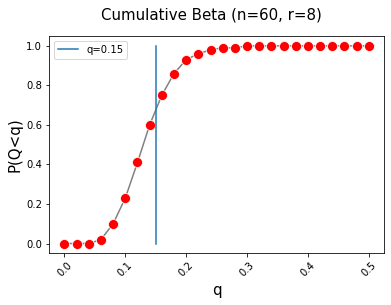

In [104]:
fig , ax = plt.subplots(1,1, figsize=(6,4))

plt.suptitle('Cumulative Beta (n=60, r=8)', fontsize=15)
sns.lineplot(x=xs, y=p2, color='gray', 
             marker='o', markersize=10, markerfacecolor='red', ax=ax)
ax.plot([0.15,0.15],[0,1], label='q=0.15')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('q', fontsize=15)
ax.set_ylabel('P(Q<q)', fontsize=15)


plt.legend()
plt.show()

### P5

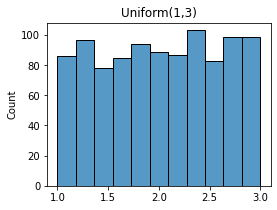

In [53]:
a, b = 1, 2
x = uniform.rvs(loc=a, scale=2, size=1000)
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.set_title(f'Uniform({a},{a+b})')
sns.histplot(x=x, ax=ax)
plt.show()

In [64]:
a, b = 0, 10.5
beta_mean = 10

In [65]:
e = expon.cdf(1, scale=beta_mean)
u = uniform.cdf(1, loc=a, scale=b)
print(f'U: {u}')
print(f'Exp: {e}')

U: 0.09523809523809523
Exp: 0.09516258196404044


In [66]:
e = expon.cdf(6, scale=beta_mean)
u = uniform.cdf(6, loc=a, scale=b)
print(f'U: {u}')
print(f'Exp: {e}')

U: 0.5714285714285714
Exp: 0.4511883639059736


In [68]:
e = expon.cdf(7, scale=beta_mean) - expon.cdf(6, scale=beta_mean)
u = uniform.cdf(7, loc=a, scale=b) - uniform.cdf(6, loc=a, scale=b)
print(f'U: {u}')
print(f'Exp: {e}')

U: 0.09523809523809523
Exp: 0.05222633230261686


In [69]:
e = ( expon.cdf(7, scale=beta_mean) - expon.cdf(6, scale=beta_mean) ) / (1-expon.cdf(6, scale=beta_mean))
u = ( uniform.cdf(7, loc=a, scale=b) - uniform.cdf(6, loc=a, scale=b) ) / (1-uniform.cdf(6, loc=a, scale=b))
print(f'U: {u}')
print(f'Exp: {e}')

U: 0.22222222222222218
Exp: 0.09516258196404033
